# Anomaly Detection of Network Packets

This is a task from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html about network traffic packets. There are several kinds of preclassified packets: normal, trojans, viruses, etc.

The goal of this work to implement a detector of no normal = anomaly packets.



## Preparing data

First need to download dataset. To do tha t- jsut use the cli utilities to complete the operation

In [2]:
  !wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz


SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = D:\Tools\GnuWin32/etc/wgetrc
--2022-01-09 22:55:51--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu... 128.195.1.86
Connecting to kdd.ics.uci.edu|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: `kddcup.data_10_percent.gz'

     0K .......... .......... .......... .......... ..........  2%  131K 16s
    50K .......... .......... .......... .......... ..........  4%  286K 11s
   100K .......... .......... .......... .......... ..........  7% 95.1M 7s
   150K .......... .......... .......... .......... ..........  9%  130M 5s
   200K .......... .......... .......... .......... .......... 11%  291K 5s
   250K .......... .......... .......... .......... .......... 14% 32.7M 4s
   300K .......... .......... .......... .......... .......... 16% 32.0M 4s
   350K .......... .......... .......... .......... ..

In [3]:
!gzip -d ./kddcup.data_10_percent.gz
# as a result - a new (csv) file appears in the root directory

gzip: ./kddcup.data_10_percent already exists;	not overwritten


In [4]:
col_labels = ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'normal', 'perl',                 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient']

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]

In [5]:
!pip install pandas

In [6]:
import pandas as pd

In [7]:
# this is a csv actually
file_path_10p = 'kddcup.data_10_percent'
df_10p = pd.read_csv(file_path_10p, header=None, names=col_names, index_col=False)
df = df_10p
df_10p.head

<bound method NDFrame.head of         duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0    

In [8]:
print(df_10p['label'].value_counts())

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64


In [9]:
from sklearn import preprocessing

In [40]:
le_10p = preprocessing.LabelEncoder()
le_10p.fit(df_10p.label)
le = le_10p
print(le_10p.classes_)

print(le.transform(['normal.']))

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']
[11]


In [11]:
col_categories = ['protocol_type', 
                  'service', 
                  'flag', 
                  'land', 
                  'logged_in', 
                  'is_host_login', 
                  'is_guest_login']

In [12]:
def get_with_one_hot_encoded(df, col_categories, le):
  cat_data = pd.get_dummies(df[col_categories])
  col_numerics = list(set(df.columns.values) - set(col_categories))
  col_numerics.remove('label')

  numerics_data = df[col_numerics].copy()
  numerics_cat_data = pd.concat([numerics_data, cat_data] ,axis=1)

  labels = df['label'].copy()
  transormed_labels = le.transform(labels)

  return numerics_cat_data, transormed_labels


In [13]:
# just checking how data looks like
print(df['service'].value_counts())

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64


In [14]:
# sample: protocol ("http", "ftp", "smtp")

#abc.protocol = "http"
#edf.protocol = "smtp"

# sample | is_http | is_ftp | is_smtp
#-----------------------------------------
# abc.      1.         0.        0 
# edf.      0.         0.        1


# do one-hot encoding for the symbolic data
cat_data = pd.get_dummies(df[col_categories])
cat_data.head(10)

,land,logged_in,is_host_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# exclude symbolic columns from the original dataset

col_numerics = list(set(df.columns.values) - set(col_categories))

In [16]:
print(col_numerics)
col_numerics.remove('label')

['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'num_compromised', 'dst_bytes', 'dst_host_srv_rerror_rate', 'wrong_fragment', 'dst_host_serror_rate', 'diff_srv_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 'urgent', 'srv_serror_rate', 'num_failed_logins', 'dst_host_rerror_rate', 'srv_rerror_rate', 'num_shells', 'num_file_creations', 'num_root', 'duration', 'num_outbound_cmds', 'count', 'dst_host_srv_count', 'srv_diff_host_rate', 'label', 'dst_host_srv_serror_rate', 'serror_rate', 'hot', 'dst_host_count', 'src_bytes', 'rerror_rate', 'dst_host_same_src_port_rate', 'root_shell', 'srv_count', 'su_attempted', 'num_access_files']


In [17]:
# and add one-hot-encoded columns
numerics_data = df[col_numerics].copy()
numerics_cat_data = pd.concat([numerics_data, cat_data] ,axis=1)

In [18]:
labels = df['label'].copy()
transormed_labels = le.transform(labels)

In [19]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [20]:
x_10p, y_10p = get_with_one_hot_encoded(df_10p, col_categories, le_10p)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# split dataset (with applied transforms) + labels 
# into train/test with 75% ratio

x_train, x_test, y_train, y_test = train_test_split(
    x_10p, # numerics_cat_data,
    y_10p, #transormed_labels,
    test_size = 0.25,
    random_state = 42)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(370515, 118)
(123506, 118)
(370515,)
(123506,)


In [24]:
import pickle

In [25]:
preprocessed_data = {
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
    'y_test': y_test,
    'le': le_10p
}

pickle_path = 'kddcup.data_10_percent.pkl'
with open(pickle_path, 'wb') as f:
  pickle.dump(preprocessed_data, f)

## 1. Random Forest approach

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [27]:
model = RandomForestClassifier(max_depth=5) 
model.fit(x_train, y_train) 

RandomForestClassifier(max_depth=5)

In [29]:
from sklearn import tree
from os import system
import graphviz

estimator = model.estimators_[0] 
feature_names = [i for i in x_train.columns] 

tree.export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names, 
                rounded = True, 
                filled = True) 
 
#system.call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) 
 
#Image(filename = 'tree.png') 

#from IPython.display import display
#display(graphviz.Source(tree_dot))


In [30]:
!dot -Tpng tree.dot -o tree.png

In [31]:
y_predict = model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

<AxesSubplot:>

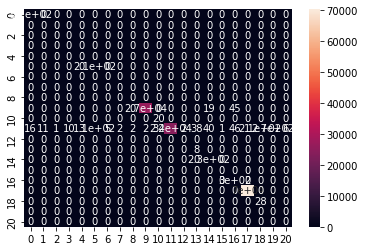

In [35]:
matr = confusion_matrix(y_predict, y_test)
sn.heatmap(matr, annot=True)


## 2. GAN approach

In [ ]:
import pickle

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import collections

from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.optimizers import Adam
from keras import Model

# https://github.com/tqdm/tqdm
from tqdm import tqdm

import matplotlib.pyplot as plt

In [ ]:
# load data back from pickle file:
pickle_file = '/content/kdd/kddcup.data_10_percent.pkl'
with open(pickle_file, 'rb') as f:
    preprocessed_data = pickle.load(f)

# check what's inside:
for key in preprocessed_data:
  print (key)

In [ ]:
le = preprocessed_data["le"]
x_train = preprocessed_data["x_train"]
y_train = preprocessed_data["y_train"]
x_test = preprocessed_data["x_test"]
y_test = preprocessed_data["y_test"]

In [ ]:
# lets identify what results do we actually have in labels..
np.unique(y_test)

In [ ]:
# we need to distinguish 'Normal' vs rest of labels, hence lets preprocess them a bit:

# find Normal class label:
pd.DataFrame(le.classes_)
# normal. == 11

In [ ]:
NORMAL_LABEL = 11

# Semantics:
#  0 - real data, "normal"
#  1 - real, but not normal

# decode multi-class verctor into binary
y_train[y_train != NORMAL_LABEL] = 1
y_train[y_train == NORMAL_LABEL] = 0

y_test[y_test != NORMAL_LABEL] = 1
y_test[y_test == NORMAL_LABEL] = 0


In [ ]:
# we want to keep Normal packets for GAN training

temp = x_train.copy()
temp['label'] = y_train
temp = temp.loc[temp['label'] == 0]
temp = temp.drop('label', axis = 1)
x_train = temp.copy() 

# as a result:
# training dataset - will contain only normal packets
# test datatet - will contain both types of data


In [ ]:
scaler01 = MinMaxScaler()

x_train = scaler01.fit_transform(x_train)
x_test = scaler01.transform(x_test)

In [ ]:
dataset = {
    'x_train': x_train.astype(np.float32),
    'y_train': y_train.astype(np.float32),
    'x_test': x_test.astype(np.float32),
    'y_test': y_test.astype(np.float32)
}

In [ ]:
print('Training set, normal packets = ', x_train.shape[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[1])


Gan model to build:


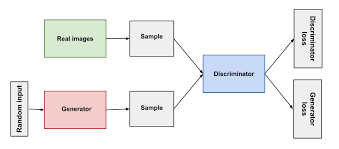


In [ ]:
# load data back from pickle file:
pickle_file = '/content/kdd/kddcup.data_10_percent.pkl'
with open(pickle_file, 'rb') as f:
    preprocessed_data = pickle.load(f)

# check what's inside:
for key in preprocessed_data:
  print (key)

x_train
x_test
y_train
y_test
le


In [ ]:
le = preprocessed_data["le"]
x_train = preprocessed_data["x_train"]
y_train = preprocessed_data["y_train"]
x_test = preprocessed_data["x_test"]
y_test = preprocessed_data["y_test"]

In [ ]:
# we need to distinguish 'Normal' vs rest of labels, hence lets preprocess them a bit:

# find Normal class label:
pd.DataFrame(le.classes_)
# normal. == 11

,0
0,back.
1,buffer_overflow.
2,ftp_write.
3,guess_passwd.
4,imap.
5,ipsweep.
6,land.
7,loadmodule.
8,multihop.
9,neptune.


In [ ]:
NORMAL_LABEL = 11

# Semantics:
#  0 - real data, "normal"
#  1 - real, but not normal

# decode multi-class verctor into binary
y_train[y_train != NORMAL_LABEL] = 1
y_train[y_train == NORMAL_LABEL] = 0

y_test[y_test != NORMAL_LABEL] = 1
y_test[y_test == NORMAL_LABEL] = 0


In [ ]:
# we want to keep Normal packets for GAN training

temp = x_train.copy()
temp['label'] = y_train
temp = temp.loc[temp['label'] == 0]
temp = temp.drop('label', axis = 1)
x_train = temp.copy() 

# as a result:
# training dataset - will contain only normal packets
# test datatet - will contain both types of data


In [ ]:
scaler01 = MinMaxScaler()

x_train = scaler01.fit_transform(x_train)
x_test = scaler01.transform(x_test)

In [ ]:
dataset = {
    'x_train': x_train.astype(np.float32),
    'y_train': y_train.astype(np.float32),
    'x_test': x_test.astype(np.float32),
    'y_test': y_test.astype(np.float32)
}

In [ ]:
print('Training set, normal packets = ', x_train.shape[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[1])


Training set, normal packets =  73011
Testing set, normal packets =  24267
Testing set, normal packets =  99239


In [ ]:
### Lets define Generator network
def generator_model(optimizer) : 
  model = Sequential()
  model.add(Dense(128, input_dim = 118))
  model.add(Activation('tanh'))

  model.add(Dense(128))
  model.add(Activation('tanh'))

  model.add(Dense(256))
  model.add(Activation('tanh'))

  model.add(Dense(256))
  model.add(Activation('relu'))

  model.add(Dense(118))
  model.add(Activation('relu'))

  model.compile(loss = 'binary_crossentropy', optimizer=optimizer)

  return model

In [ ]:
### Lets define Descriminator network

def discriminator_model(optimizer) : 
  model = Sequential()
  model.add(Dense(256, input_dim = 118))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer=optimizer)

  return model

In [ ]:
def gan_model(generator, discriminator, optimizer, input_dim=118): 
  discriminator.trainable = False

  inputTensor = Input(shape = (input_dim,))
  x = generator(inputTensor)

  outTensor = discriminator(x)

  model = Model(inputs = inputTensor, outputs = outTensor)
  model.compile(loss = 'binary_crossentropy', optimizer=optimizer)

  return model

In [ ]:
epochs = 4
batch_size = 512
learning_rate = 0.00001

x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'], dataset['x_test'], dataset['y_test']

adam = Adam(lr = learning_rate)

# create initial models:
generator = generator_model(adam)
discriminator = discriminator_model(adam)
gan = gan_model(generator, discriminator, adam, input_dim = 118)

batch_count = x_train.shape[0] // batch_size
print('Total batches: ', batch_count)

d_history = []
gan_history = []


for epoch in range(epochs):

    pbar = tqdm(total=batch_count)

    for index in range(batch_count):

      pbar.update(1)

      # fake results
      noise = np.random.normal(0, 1, size=[batch_size, 118])
      generated_batch_result = generator.predict_on_batch(noise)

      # normal results
      batch_start_index = index * batch_size
      batch_end_index = (index + 1) * batch_size
      normal_batch = x_train[batch_start_index:batch_end_index]

      # [generated_batch_result, normal_batch]
      # 0 - normal data
      # 1 - anomaly data

      y_batch_discriminator = np.ones(2 * batch_size)
      y_batch_discriminator[:batch_size] = 0
      x_batch_discriminator = np.concatenate((generated_batch_result,normal_batch))

      # Discriminator train part
      discriminator.trainable = True
      d_loss = discriminator.train_on_batch(x_batch_discriminator, y_batch_discriminator)

      # Generator part
      y_batch_generator = np.ones(batch_size)
      discriminator.trainable = False
      g_loss = gan.train_on_batch(noise, y_batch_generator)

      d_history.append(d_loss)
      gan_history.append(g_loss)

      pbar.set_description(f'[D loss: {d_loss}, G Loss: {g_loss}]');

    pbar.close();
    print(f'Epoch {epoch} done, [D loss: {d_loss}, G Loss: {g_loss}]');



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Total batches:  142



  0%|          | 0/142 [00:00<?, ?it/s]
[D loss: 0.6906386017799377, G Loss: 0.6547626256942749]:   1%|          | 1/142 [00:01<02:37,  1.12s/it]
[D loss: 0.6906386017799377, G Loss: 0.6547626256942749]:   1%|▏         | 2/142 [00:01<01:18,  1.78it/s]
[D loss: 0.6910973787307739, G Loss: 0.6554341316223145]:   1%|▏         | 2/142 [00:01<01:18,  1.78it/s]
[D loss: 0.6910973787307739, G Loss: 0.6554341316223145]:   2%|▏         | 3/142 [00:01<00:51,  2.68it/s]
[D loss: 0.690444827079773, G Loss: 0.6537899971008301]:   2%|▏         | 3/142 [00:01<00:51,  2.68it/s] 
[D loss: 0.6911277174949646, G Loss: 0.6531920433044434]:   3%|▎         | 4/142 [00:01<00:51,  2.68it/s]
[D loss: 0.6911277174949646, G Loss: 0.6531920433044434]:   4%|▎         | 5/142 [00:01<00:31,  4.34it/s]
[D loss: 0.6899380683898926, G Loss: 0.6526204347610474]:   4%|▎         | 5/142 [00:01<00:31,  4.34it/s]
[D loss: 0.6904226541519165, G Loss: 0.656252384185791]:   4%|▍         | 6/142 [00:01<00:31,  4.34it/s] 
[D lo

Epoch 0 done, [D loss: 0.5959756970405579, G Loss: 0.683582067489624]



  0%|          | 0/142 [00:00<?, ?it/s]
[D loss: 0.5936660766601562, G Loss: 0.6840802431106567]:   1%|          | 1/142 [00:00<00:12, 11.30it/s]
[D loss: 0.5960613489151001, G Loss: 0.6842873692512512]:   1%|▏         | 2/142 [00:00<00:11, 12.01it/s]
[D loss: 0.5960613489151001, G Loss: 0.6842873692512512]:   2%|▏         | 3/142 [00:00<00:07, 17.67it/s]
[D loss: 0.5932763814926147, G Loss: 0.6847149729728699]:   2%|▏         | 3/142 [00:00<00:07, 17.67it/s]
[D loss: 0.5893290042877197, G Loss: 0.6864827275276184]:   3%|▎         | 4/142 [00:00<00:07, 17.67it/s]
[D loss: 0.5893290042877197, G Loss: 0.6864827275276184]:   4%|▎         | 5/142 [00:00<00:09, 14.37it/s]
[D loss: 0.5917937755584717, G Loss: 0.684680700302124]:   4%|▎         | 5/142 [00:00<00:09, 14.37it/s] 
[D loss: 0.5878438949584961, G Loss: 0.6826049089431763]:   4%|▍         | 6/142 [00:00<00:09, 14.37it/s]
[D loss: 0.5878438949584961, G Loss: 0.6826049089431763]:   5%|▍         | 7/142 [00:00<00:09, 13.52it/s]
[D lo

Epoch 1 done, [D loss: 0.5011420845985413, G Loss: 0.7347685694694519]



  0%|          | 0/142 [00:00<?, ?it/s]
[D loss: 0.5021083354949951, G Loss: 0.7326644659042358]:   1%|          | 1/142 [00:00<00:10, 13.84it/s]
[D loss: 0.5060453414916992, G Loss: 0.7382371425628662]:   1%|▏         | 2/142 [00:00<00:10, 13.32it/s]
[D loss: 0.5060453414916992, G Loss: 0.7382371425628662]:   2%|▏         | 3/142 [00:00<00:07, 18.91it/s]
[D loss: 0.5023066997528076, G Loss: 0.7385793924331665]:   2%|▏         | 3/142 [00:00<00:07, 18.91it/s]
[D loss: 0.4959627389907837, G Loss: 0.7339743375778198]:   3%|▎         | 4/142 [00:00<00:07, 18.91it/s]
[D loss: 0.4959627389907837, G Loss: 0.7339743375778198]:   4%|▎         | 5/142 [00:00<00:09, 14.57it/s]
[D loss: 0.49707329273223877, G Loss: 0.7407997846603394]:   4%|▎         | 5/142 [00:00<00:09, 14.57it/s]
[D loss: 0.49649256467819214, G Loss: 0.7413943409919739]:   4%|▍         | 6/142 [00:00<00:09, 14.57it/s]
[D loss: 0.49649256467819214, G Loss: 0.7413943409919739]:   5%|▍         | 7/142 [00:00<00:09, 13.51it/s]
[D

Epoch 2 done, [D loss: 0.5018652677536011, G Loss: 0.7774769067764282]



  0%|          | 0/142 [00:00<?, ?it/s]
[D loss: 0.499051034450531, G Loss: 0.786413311958313]:   1%|          | 1/142 [00:00<00:10, 13.54it/s]
[D loss: 0.5088713765144348, G Loss: 0.7780699729919434]:   1%|▏         | 2/142 [00:00<00:10, 13.16it/s]
[D loss: 0.5088713765144348, G Loss: 0.7780699729919434]:   2%|▏         | 3/142 [00:00<00:07, 19.31it/s]
[D loss: 0.5109087228775024, G Loss: 0.7691994309425354]:   2%|▏         | 3/142 [00:00<00:07, 19.31it/s]
[D loss: 0.49683433771133423, G Loss: 0.7804403305053711]:   3%|▎         | 4/142 [00:00<00:07, 19.31it/s]
[D loss: 0.49683433771133423, G Loss: 0.7804403305053711]:   4%|▎         | 5/142 [00:00<00:10, 13.68it/s]
[D loss: 0.5034146308898926, G Loss: 0.7765127420425415]:   4%|▎         | 5/142 [00:00<00:10, 13.68it/s] 
[D loss: 0.49726390838623047, G Loss: 0.7844289541244507]:   4%|▍         | 6/142 [00:00<00:09, 13.68it/s]
[D loss: 0.49726390838623047, G Loss: 0.7844289541244507]:   5%|▍         | 7/142 [00:00<00:10, 12.40it/s]
[D

Epoch 3 done, [D loss: 0.5978512763977051, G Loss: 0.8033300638198853]


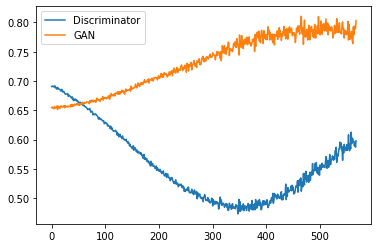

In [ ]:
plt.plot(d_history, label = 'Discriminator')
plt.plot(gan_history, label = 'GAN')
plt.legend()


## 3. Deep Autoencoders Approach

In [ ]:
import pickle

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import collections
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.optimizers import Adam
from keras import Model

# https://github.com/tqdm/tqdm
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
Model is split into 2 parts:
 - Encoder
 - Decoder

 Model Output Layer has the same dimension as Input lyaer



 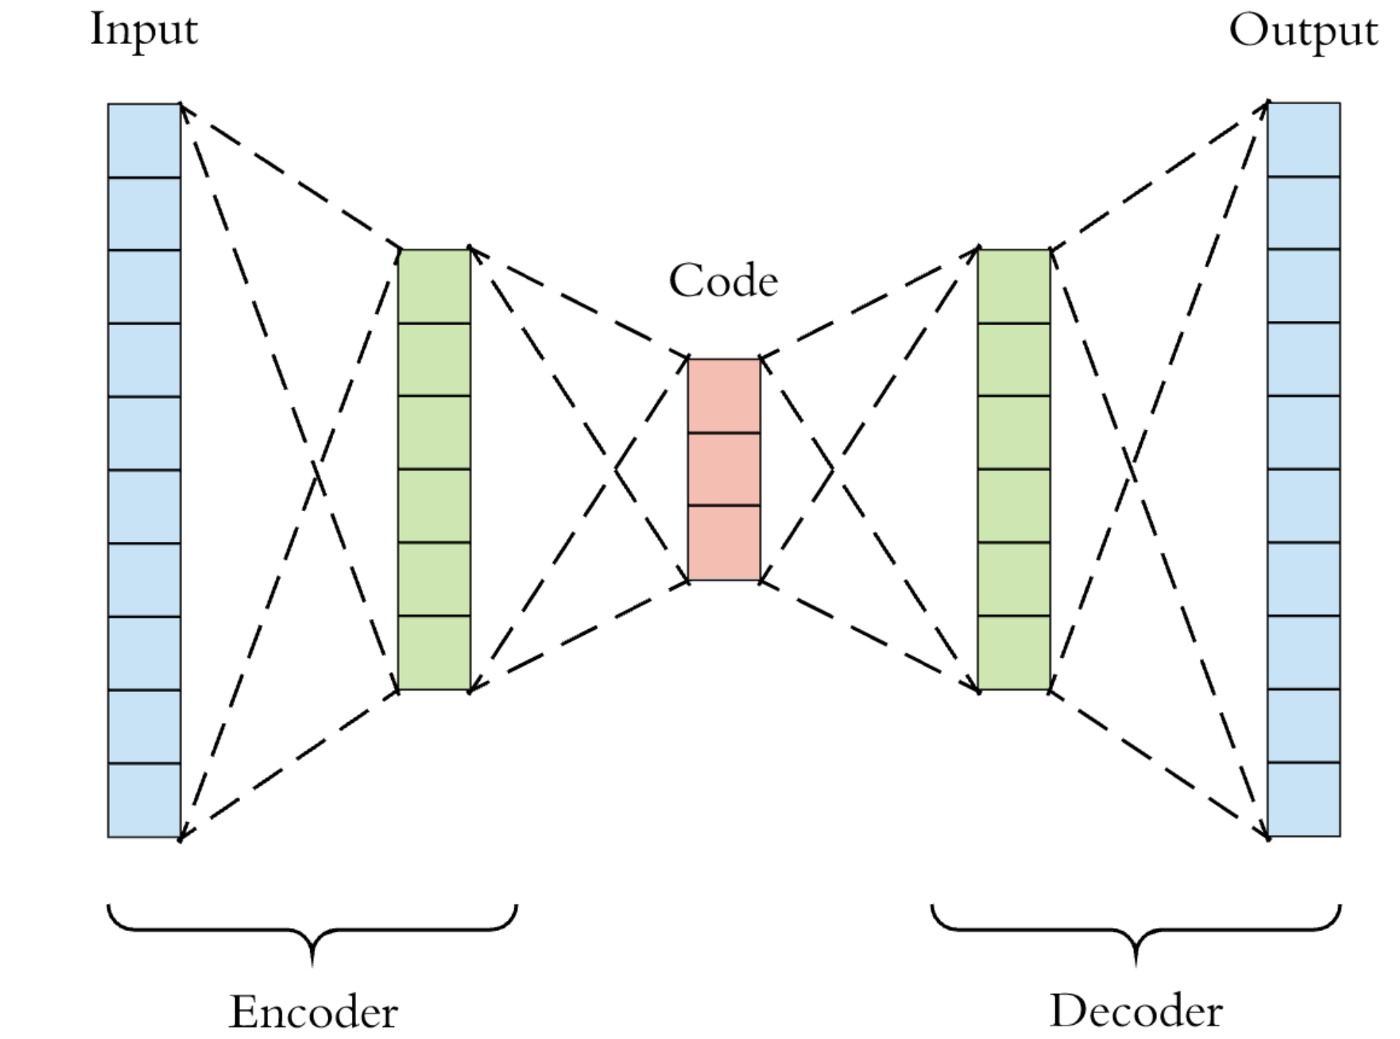

In [ ]:
# load data back from pickle file:
pickle_file = '/content/kddcup.data_10_percent.pkl'
with open(pickle_file, 'rb') as f:
    preprocessed_data = pickle.load(f)

# check what's inside:
for key in preprocessed_data:
  print (key)

x_train
x_test
y_train
y_test
le


In [ ]:
le = preprocessed_data["le"]
x_train = preprocessed_data["x_train"]
y_train = preprocessed_data["y_train"]
x_test = preprocessed_data["x_test"]
y_test = preprocessed_data["y_test"]

In [ ]:
# we need to distinguish 'Normal' vs rest of labels, hence lets preprocess them a bit:

# find Normal class label:
pd.DataFrame(le.classes_)
# normal. == 11

,0
0,back.
1,buffer_overflow.
2,ftp_write.
3,guess_passwd.
4,imap.
5,ipsweep.
6,land.
7,loadmodule.
8,multihop.
9,neptune.


In [ ]:
NORMAL_LABEL = 11

def get_binary_labels(y):
  temp = y.copy()

  # Semantics:
  #  0 - real data, "normal"
  #  1 - anomaly

  # decode multi-class verctor into binary
  temp[temp != NORMAL_LABEL] = 1
  temp[temp == NORMAL_LABEL] = 0

  return temp

In [ ]:
# decode y-* from multi-class to binaries

y_train = get_binary_labels(y_train)
y_test = get_binary_labels(y_test)


In [ ]:
def get_normal_samples(x, y):
  # we want to keep Normal packets for Autoencoder training

  temp = x.copy()
  temp['label'] = y
  temp = temp.loc[temp['label'] == 0]
  temp = temp.drop('label', axis = 1)
  
  return temp


In [ ]:
# as a result:
# training dataset - will contain only normal packets
# test datatet - will contain both types of data

x_train_normal = get_normal_samples(x_train, y_train)

In [ ]:
scaler01 = MinMaxScaler()

x_train_normal = scaler01.fit_transform(x_train_normal)
x_test = scaler01.transform(x_test)

In [ ]:
dataset = {
    'x_train': x_train.astype(np.float32),
    'y_train': y_train.astype(np.float32),
    'x_test': x_test.astype(np.float32),
    'y_test': y_test.astype(np.float32)
}

In [ ]:
print('Training set, normal packets = ', x_train.shape[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[0])
print('Testing set, normal packets = ', collections.Counter(y_test)[1])


Training set, normal packets =  370515
Testing set, normal packets =  24267
Testing set, normal packets =  99239


In [ ]:
### Encoder Definition

### Lets define Generator network
def encoder_model(optimizer, input_dim, code_layer_size) : 
  model = Sequential()

  # hidden layers
  model.add(Dense(96, input_dim = input_dim))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(96))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(64))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(48))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(16))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(code_layer_size))
  model.add(Activation('linear'))

  model.compile(loss = 'mse', optimizer=optimizer)

  return model

In [ ]:
### Lets define Generator network
def decoder_model(optimizer, input_dim, code_layer_size) : 
  model = Sequential()

  model.add(Dense(16, input_dim = code_layer_size))
  model.add(Activation('linear'))

  model.add(Dense(16))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(48))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(64))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(96))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(Dense(input_dim))
  model.add(Activation('linear'))

  model.compile(loss = 'mse', optimizer=optimizer)

  return model

In [ ]:
def autoencoder_model(encoder, decoder, optimizer, input_dim=118): 
  encoder.trainable = True
  decoder.trainable = True
  
  inputTensor = Input(shape = (input_dim,))

  x = encoder(inputTensor)
  outTensor = decoder(x)

  model = Model(inputs = inputTensor, outputs = outTensor)
  model.compile(loss = 'mse', optimizer=optimizer)

  return model

In [ ]:
class CustomCallback(keras.callbacks.Callback):

    def __init__(self):
      self.loss_history = []
      self.val_loss_history = []

    def on_test_batch_end(self, batch, logs=None):
      
      self.loss_history.append(logs["loss"])
      #self.val_loss_history.append(logs["val_loss"])

In [ ]:
# Hyperparameters
input_dim = 118
code_layer_size = 4
epochs = 20
batch_size = 256
learning_rate = 0.00001


In [ ]:
adam = Adam(lr = learning_rate)

encoder = encoder_model(adam, input_dim, code_layer_size)
decoder = decoder_model(adam, input_dim, code_layer_size)

autoencoder = autoencoder_model(encoder, decoder, adam)

#autoencoder.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# train models
#x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'], dataset['x_test'], dataset['y_test']

#callback_history = CustomCallback()

history = autoencoder.fit(x_train_normal, x_train_normal, 
                batch_size=batch_size, 
                epochs = epochs, 
                validation_split=0.3)
                #validation_data=(x_test, x_test))#,
                #callbacks=[callback_history])

Epoch 1/20
200/200 [==============================] - 3s 11ms/step - loss: 0.0726 - val_loss: 0.0593
Epoch 2/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0645 - val_loss: 0.0526
Epoch 3/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0558 - val_loss: 0.0401
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0459 - val_loss: 0.0279
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0378 - val_loss: 0.0206
Epoch 6/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0328 - val_loss: 0.0175
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0298 - val_loss: 0.0163
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0278 - val_loss: 0.0156
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0262 - val_loss: 0.0152
Epoch 10/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0250 - val_loss: 0

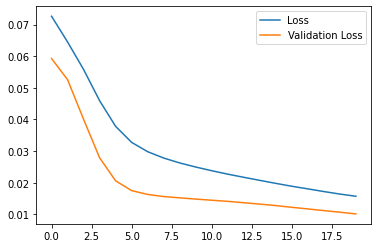

In [ ]:
#plt.plot(callback_history.loss_history, label = 'Autoencoder')
#plt.legend()

#print(history.history["val_loss"])
plt.plot(history.history["loss"], label = 'Loss')
plt.plot(history.history["val_loss"], label = 'Validation Loss')

plt.legend()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(encoder, to_file='model_encoder.png', show_shapes=True, show_layer_names=True)
plot_model(decoder, to_file='model_decoder.png', show_shapes=True, show_layer_names=True)


In [ ]:
## TASK: do comparison of normally-encoded vs anomaly-encoded data discrepancies

In [ ]:
x_train_normal_reconstructed = autoencoder.predict(x_train_normal)

In [ ]:
recostructed_scores_normal = np.mean((x_train_normal - x_train_normal_reconstructed)**2, axis = 1)

(array([1.6756e+04, 2.1811e+04, 1.5200e+03, 5.3200e+02, 6.5400e+02,
        5.9600e+02, 6.0320e+03, 5.4360e+03, 2.5200e+03, 3.7300e+03,
        3.7890e+03, 3.3660e+03, 1.8630e+03, 7.8200e+02, 4.2900e+02,
        7.8700e+02, 9.9400e+02, 3.5900e+02, 2.8100e+02, 2.9300e+02,
        2.9200e+02, 5.3000e+01, 3.6000e+01, 2.0000e+01, 8.0000e+00,
        1.1000e+01, 1.3000e+01, 1.1000e+01, 1.1000e+01, 3.0000e+00,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00071242, 0.00227981, 0.00384719, 0.00541458, 0.00698196,
        0.00854935, 0.01011673, 0.01168412, 0.0132515 , 0.01481889,
        0.01638628, 0.01795366, 0.01952105, 0.02108843, 0.02265582,
        0.0242232 , 0.02579059, 0.02735797, 0.02892536, 0.03049275,
        0.03206013, 0.03362752, 0.0351949 , 0.

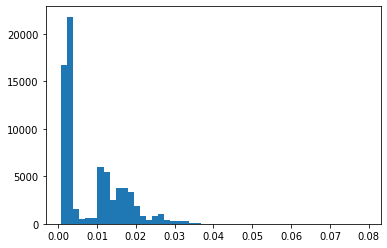

In [ ]:
plt.hist(recostructed_scores_normal, bins = 50, label = 'Normal Reconstruction')

In [ ]:
x_test_reconstrcuted = autoencoder.predict(x_test)

In [ ]:
recostructed_scores = np.mean((x_test - x_test_reconstrcuted)**2, axis = 1)

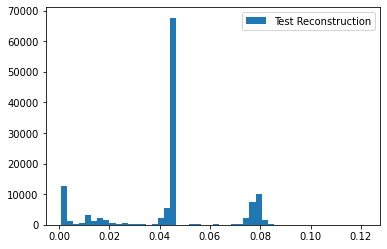

In [ ]:
plt.hist(recostructed_scores, bins = 50, label = 'Test Reconstruction')
plt.legend()

In [ ]:
plt.figure()

plt.plot(fpr, tpr, color="navy", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
def get_optimal_threschold (autoencoder, x, y):
    x_reconstrcuted = autoencoder.predict(x)
    scores = np.mean((x - x_reconstrcuted)**2, axis = 1)

    fpr, tpr, thresholds = metrics.roc_curve(y, scores)

    optimal_idx = np.argmax(tpr - fpr)
    optimal = thresholds[optimal_idx]

    return optimal

In [ ]:
optimal = get_optimal_threschold(autoencoder, x_test, y_test)
print(optimal)

0.046342893223314995


In [ ]:
x_train_all = scaler01.fit_transform(x_train)

In [ ]:
train_optimal = get_optimal_threschold(autoencoder, x_train_all, y_train)

In [ ]:
train_optimal

0.04631982917275317

In [ ]:
threshold = optimal
#threshold = train_optimal
#threshold = 0.005


  prediction_labels = (recostructed_scores > threshold).astype(int)

In [ ]:
results = metrics.confusion_matrix(y_test, prediction_labels)

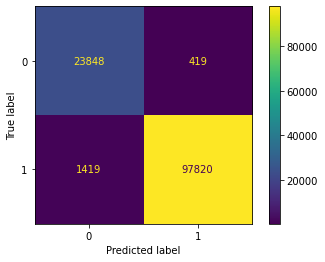

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=results)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=prediction_labels)

In [ ]:
print(accuracy)

0.9851181319126197


# 4. XGBoost Approach

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,classification_report,roc_curve
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# load data back from pickle file:
pickle_file = '/content/kddcup.data_10_percent.pkl'
with open(pickle_file, 'rb') as f:
    preprocessed_data = pickle.load(f)

# check what's inside:
for key in preprocessed_data:
  print (key)

x_train
x_test
y_train
y_test
le


In [ ]:
le = preprocessed_data["le"]
x_train = preprocessed_data["x_train"]
y_train = preprocessed_data["y_train"]
x_test = preprocessed_data["x_test"]
y_test = preprocessed_data["y_test"]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(370515, 118)
(370515,)
(123506, 118)
(123506,)


In [ ]:
binary_y_train = get_binary_labels(y_train)
binary_y_test = get_binary_labels(y_test)

In [ ]:
dtrain = xgb.DMatrix(x_train, label=binary_y_train)
dtest = xgb.DMatrix(x_test, label=binary_y_test)

In [ ]:
params = {
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'nthread': 4,
    'scale_pos_weight': 1,
    'seed': 27,
    'verbose': True,
    'num_rounds': 10
}
num_rounds = params['num_rounds']
evals = [(dtrain, 'train'), (dtest, 'test')]

In [ ]:
model = xgb.train(params, dtrain, num_rounds, evals=evals)

[0]	train-error:0.002054	test-error:0.002332
[1]	train-error:0.002022	test-error:0.002316
[2]	train-error:0.0018	test-error:0.002162
[3]	train-error:0.000669	test-error:0.000931
[4]	train-error:0.000907	test-error:0.001182
[5]	train-error:0.000931	test-error:0.001198
[6]	train-error:0.000861	test-error:0.00115
[7]	train-error:0.000907	test-error:0.001166
[8]	train-error:0.001077	test-error:0.001295
[9]	train-error:0.000923	test-error:0.00119


In [ ]:
predictions = model.predict(dtest)

In [ ]:
print(predictions)

[1 1 1 ... 1 0 0]


In [ ]:
threshold = 0.5
predictions = (predictions > threshold).astype(int)

In [ ]:
predictions.sum()

99150

In [ ]:
accuracy = accuracy_score(binary_y_test, predictions)
print(accuracy)

0.9988097744239146


In [ ]:
fpr, tpr, thresholds = roc_curve(binary_y_test, predictions)




In [ ]:
binary_y_test.shape

(123506,)

No handles with labels found to put in legend.


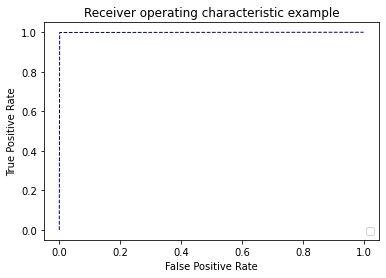

In [ ]:
plt.figure()

plt.plot(fpr, tpr, color="navy", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc = roc_auc_score(binary_y_test, predictions)
print(auc)

0.9988079564050024


In [ ]:
results = confusion_matrix(binary_y_test, predictions)

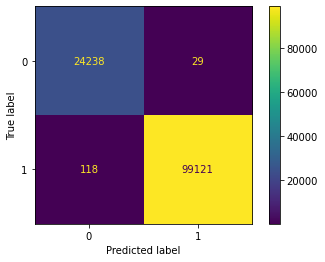

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=results)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

# 4. Validation on Full Dataset

In [ ]:
 # download full 100% dataset
 !wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz


--2021-12-11 08:34:55--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18115902 (17M) [application/x-gzip]
Saving to: ‘kddcup.data.gz’

kddcup.data.gz      100%[===================>]  17.28M  3.01MB/s    in 6.7s    

2021-12-11 08:35:02 (2.59 MB/s) - ‘kddcup.data.gz’ saved [18115902/18115902]



In [ ]:
# unzip to the local folder
# it contains a .csv file with all the records:
! gzip -d ./kddcup.data.gz

In [ ]:
# this is a csv actually
# header = 0 says to get column names from header, without passing them expicitely
file_path = '/content/kddcup.data'

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]

df = pd.read_csv(file_path, header=None, names=col_names, index_col=False)
df.head

<bound method NDFrame.head of          duration protocol_type  ... dst_host_srv_rerror_rate    label
0               0           tcp  ...                      0.0  normal.
1               0           tcp  ...                      0.0  normal.
2               0           tcp  ...                      0.0  normal.
3               0           tcp  ...                      0.0  normal.
4               0           tcp  ...                      0.0  normal.
...           ...           ...  ...                      ...      ...
4898426         0           tcp  ...                      0.0  normal.
4898427         0           tcp  ...                      0.0  normal.
4898428         0           tcp  ...                      0.0  normal.
4898429         0           tcp  ...                      0.0  normal.
4898430         0           tcp  ...                      0.0  normal.

[4898431 rows x 42 columns]>

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df.label)

print(le.classes_)

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


In [ ]:
col_categories = ['protocol_type', 
                  'service', 
                  'flag', 
                  'land', 
                  'logged_in', 
                  'is_host_login', 
                  'is_guest_login']

In [ ]:
df.value_counts('service')

service
ecr_i        2811660
private      1100831
http          623091
smtp           96554
other          72653
              ...   
tftp_u             3
aol                2
http_8001          2
harvest            2
http_2784          1
Length: 70, dtype: int64

In [ ]:
df_10p.value_counts('service')

service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
red_i           1
tftp_u          1
Length: 66, dtype: int64

In [ ]:
# pd.set_option('display.max_columns', None)

In [ ]:
df.groupby('service').size()

service
IRC           521
X11           135
Z39_50       1078
aol             2
auth         3382
             ... 
urp_i        5378
uucp         1041
uucp_path    1057
vmnet        1053
whois        1073
Length: 70, dtype: int64

In [ ]:
# find shared items existing in both dataframes

df_keys = list(df.groupby('service').groups.keys())
df_10p_keys = list(df_10p.groupby('service').groups.keys())

shared_items = [k for k in df_keys if k in df_10p_keys]
print(len(shared_items))

66


In [ ]:
# find items only existing in full df (=100%) or in tructated one (10% dataset)

df_unique = [k for k in df_keys if k not in shared_items]
df_10p_unique = [k for k in df_10p_keys if k not in shared_items]

In [ ]:
not_needed_services = df_unique

In [ ]:
# remove from the full dataframe those rows, which service type doesn't exist in 10% dataframe
# this will get ids of the rows to be deleted:
# x = df[df['service'].isin(not_needed_services) == True].index

df = df.drop(df[df['service'].isin(not_needed_services) == True].index, inplace=False)

In [ ]:
def removeServiceRows(df, services):
  interestRows = df[df['service'].isin(services)]
  df.drop(interestRows.index, inplace=True)

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
df.groupby('service').size()

In [ ]:
x_full, y_full = get_with_one_hot_encoded(df, col_categories, le)

In [ ]:
preprocessed_full_data = {
    'x_full': x_full,
    'y_full': y_full,
    'le': le
}

pickle_path = '/content/kddcup.data.pkl'
with open(pickle_path, 'wb') as f:
  pickle.dump(preprocessed_full_data, f)

In [ ]:
# load data back from pickle file:
pickle_file = '/content/kddcup.data.pkl'
with open(pickle_file, 'rb') as f:
    preprocessed_full_data = pickle.load(f)

# check what's inside:
for key in preprocessed_full_data:
  print (key)

x_full
y_full
le


In [ ]:
x_full = preprocessed_full_data['x_full']
y_full = preprocessed_full_data['y_full']
le_full = preprocessed_full_data['le']

In [ ]:
x_full = scaler01.transform(x_full)

In [ ]:
y_full = get_binary_labels(y_full)